# Heart Disease Prediction: A Comprehensive Machine Learning Approach


## 1. Import Libraries



In [ ]:
# ! pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Set visualization style
plt.style.use('fivethirtyeight')
sns.set_palette('deep')



## 2. Load and Explore Data



In [ ]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())



Dataset shape: (920, 16)

First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])



Missing values per column:
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [ ]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000




## 3. Exploratory Data Analysis (EDA)



In [ ]:
# Create binary target variable (0: No disease, 1: Disease)
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

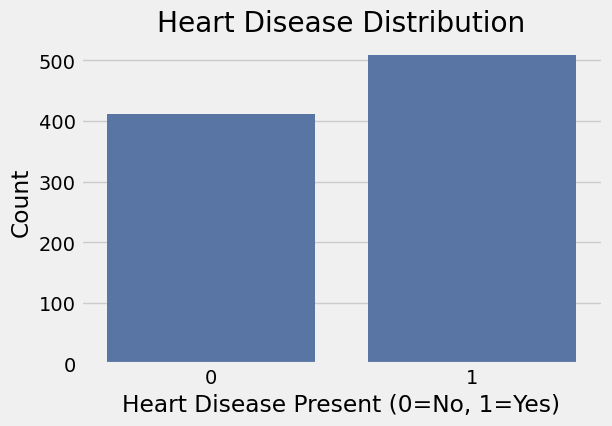

In [ ]:
# 1. Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease Present (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


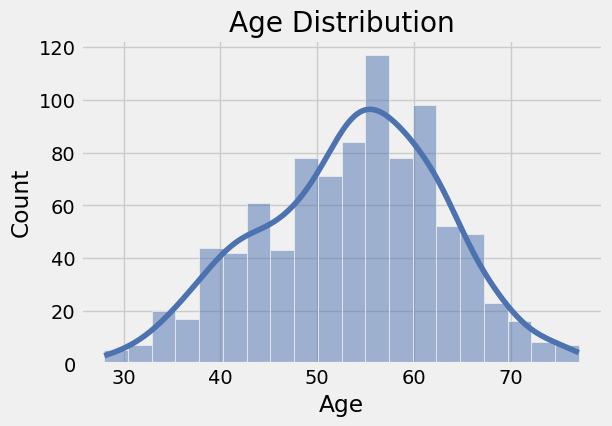

In [ ]:
# 2. Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


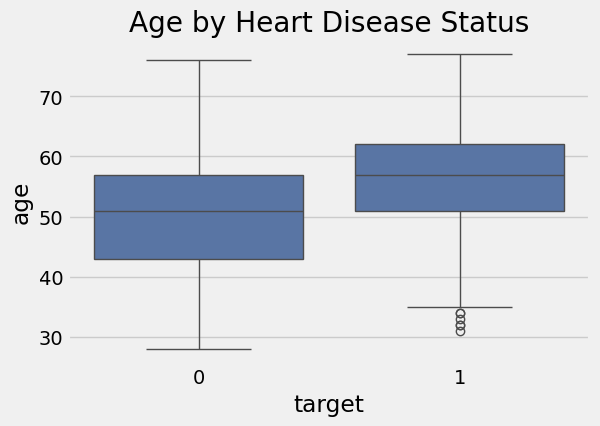

In [ ]:
# 3. Age by disease presence
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age by Heart Disease Status')
plt.show()


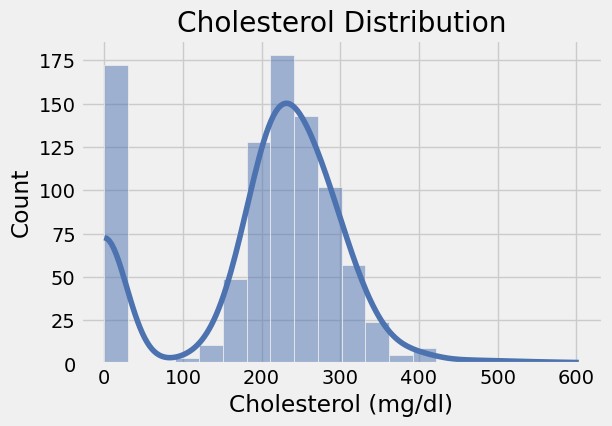

In [ ]:
# 4. Cholesterol distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['chol'], kde=True, bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()


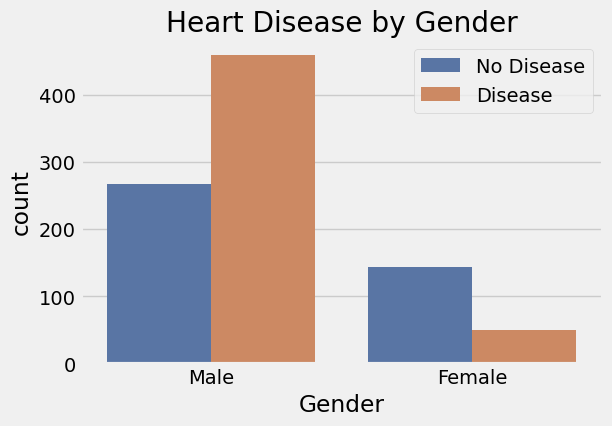

In [ ]:
# 5. Heart disease by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.legend(['No Disease', 'Disease'])
plt.show()


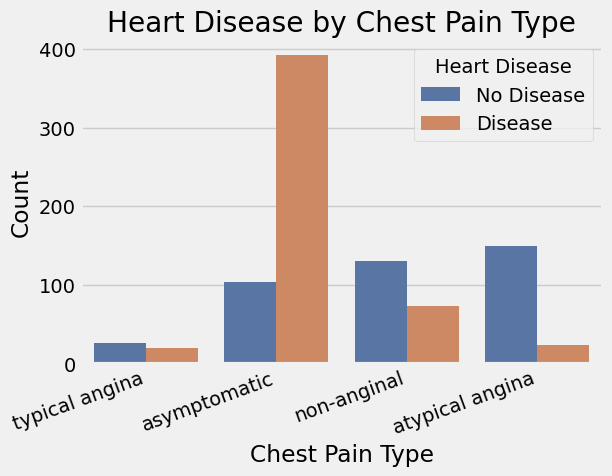

In [ ]:
# 6. Heart disease by chest pain type
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.xticks(rotation=20, ha='right')
plt.show()


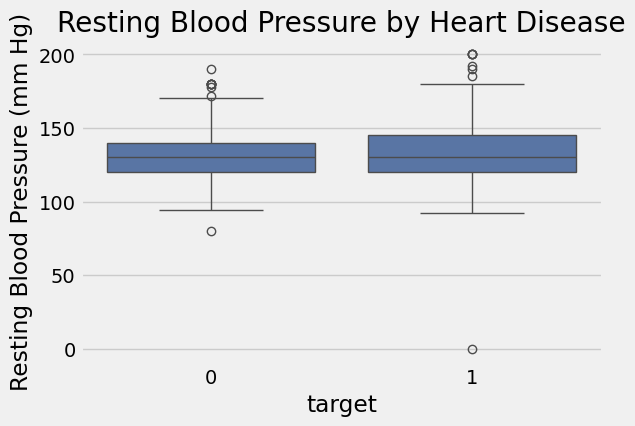

In [ ]:
# 7. Resting blood pressure by disease
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


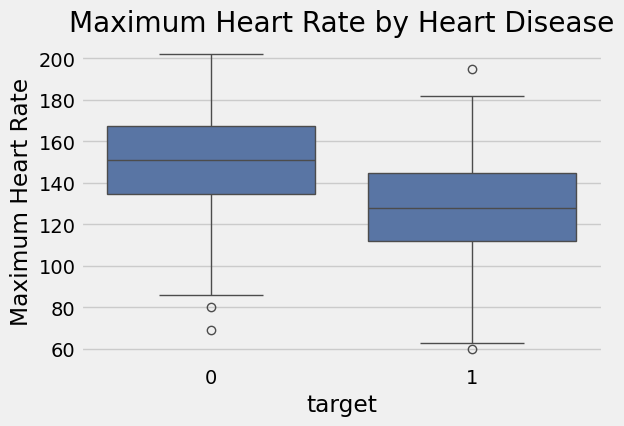

In [ ]:
# 8. Maximum heart rate by disease
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalch', data=df)
plt.title('Maximum Heart Rate by Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()


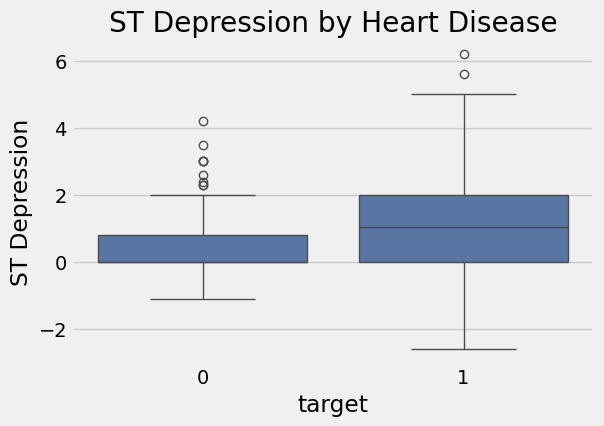

In [ ]:
# 9. ST depression by disease
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression by Heart Disease')
plt.ylabel('ST Depression')
plt.show()


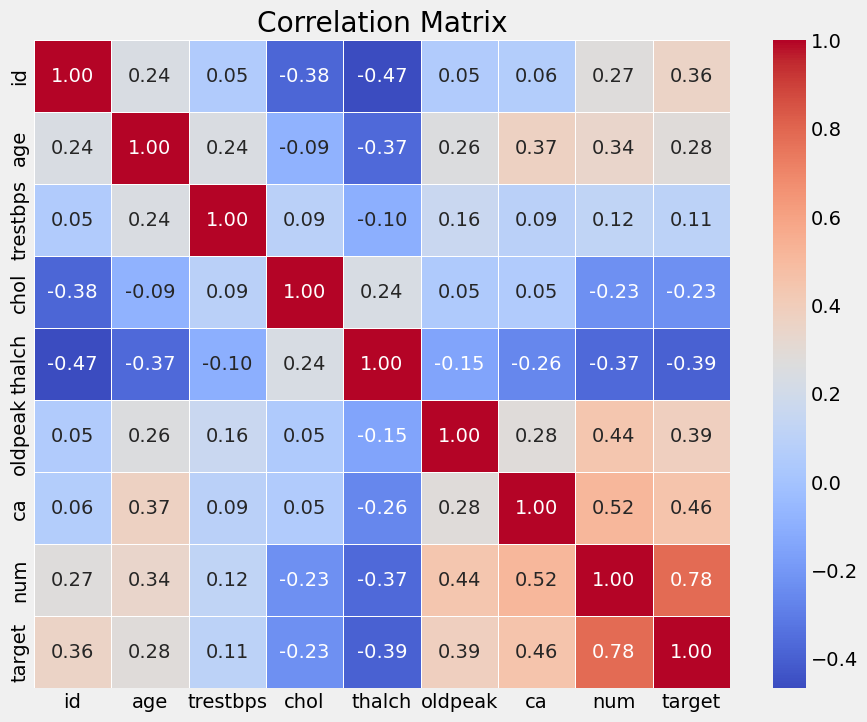

In [ ]:
# 10. Correlation heatmap
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




## 4. Data Preprocessing



In [ ]:
# Data Preprocessing
df_processed = df.copy()

# Encode categorical variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']
for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature])

# Handle missing values
for column in df_processed.columns:
    if df_processed[column].isnull().sum() > 0:
        if df_processed[column].dtype == 'object':
            # For categorical columns, use mode
            df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)
        else:
            # For numerical columns, use median
            df_processed[column].fillna(df_processed[column].median(), inplace=True)

# Feature selection
X = df_processed.drop(['id', 'num', 'target'], axis=1)
y = df_processed['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (736, 14)
Testing set shape: (184, 14)




## 5. Model Development and Evaluation




Logistic Regression Results:
Accuracy: 0.8424

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



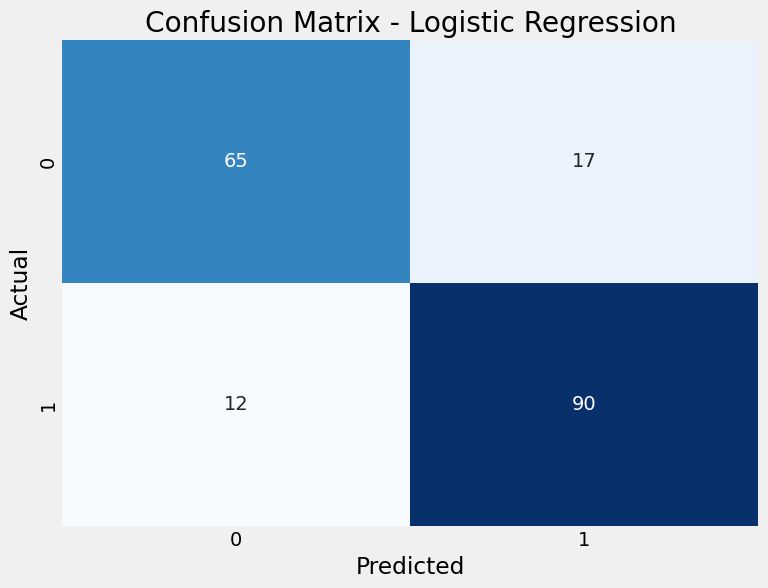


Gradient Boosting Results:
Accuracy: 0.8478

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



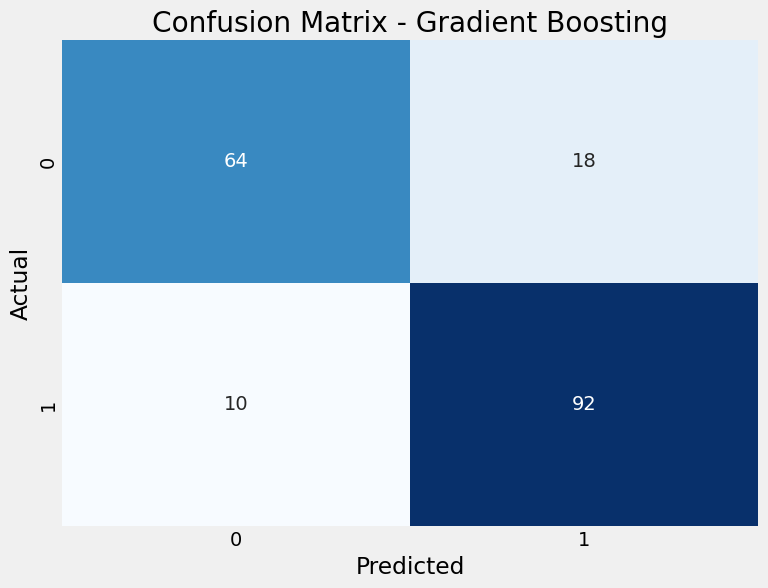


Random Forest Results:
Accuracy: 0.8478

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



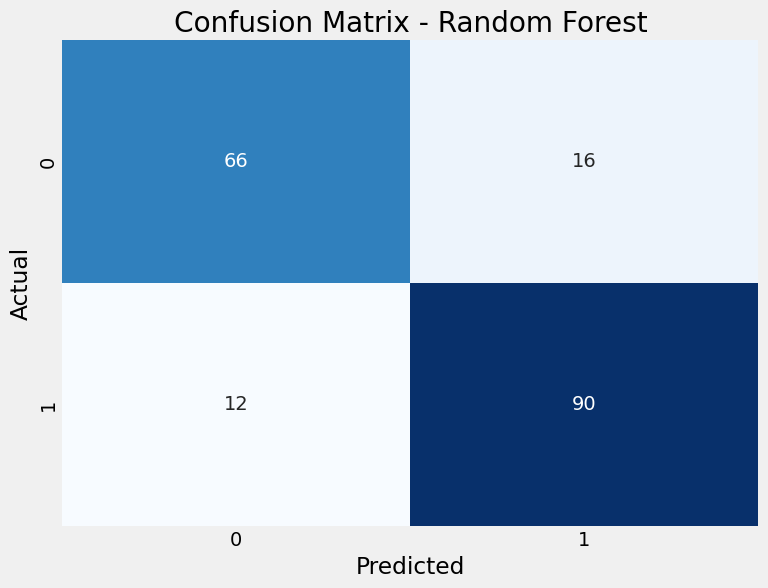

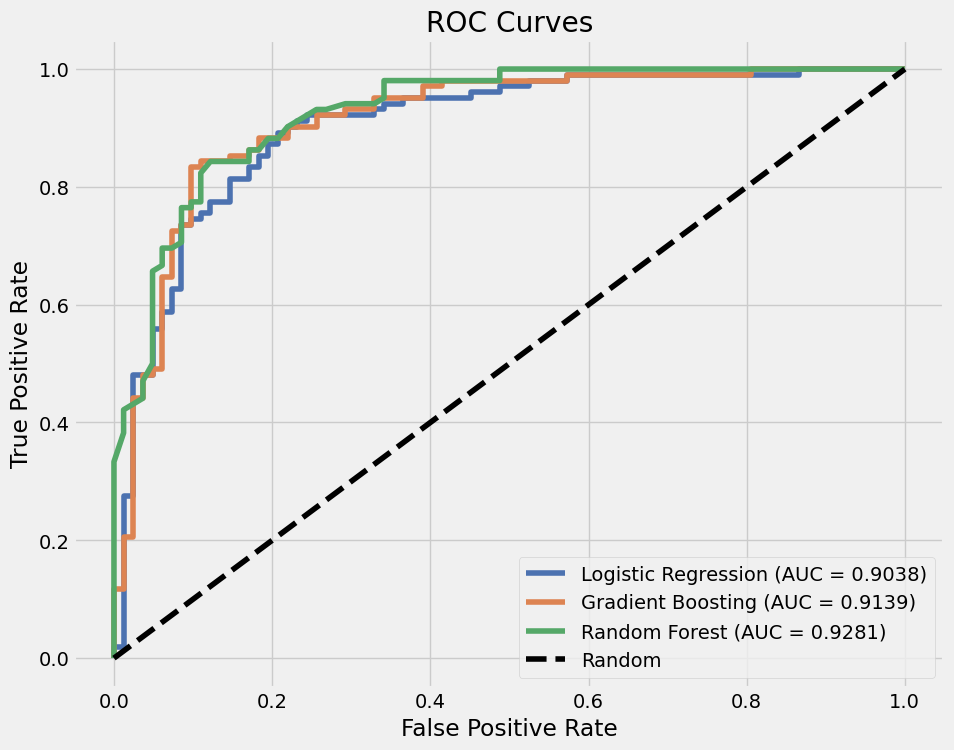


Cross-validation scores (5-fold):
Logistic Regression: 0.7837 (±0.1023)
Gradient Boosting: 0.7609 (±0.0827)
Random Forest: 0.7478 (±0.0921)


In [ ]:
# Model Development and Evaluation

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC curve and AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return {
        'model': model,
        'accuracy': accuracy,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

# Create models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Cross-validation for more reliable performance estimates
print("\nCross-validation scores (5-fold):")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



## 6. Hyperparameter Tuning



In [ ]:
# Hyperparameter Tuning

# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    }
}

# Use GridSearchCV to find the best parameters
best_models = {}
for name, model in models.items():
    print(f"\nPerforming grid search for {name}...")

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_models[name] = grid_search.best_estimator_

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate the model with best parameters
    y_pred = best_models[name].predict(X_test_scaled)
    print(f"Test accuracy with best parameters: {accuracy_score(y_test, y_pred):.4f}")


Performing grid search for Logistic Regression...
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8193
Test accuracy with best parameters: 0.8207

Performing grid search for Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation score: 0.8179
Test accuracy with best parameters: 0.8478

Performing grid search for Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8302
Test accuracy with best parameters: 0.8478



Logistic Regression Results:
Accuracy: 0.8207

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.82      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



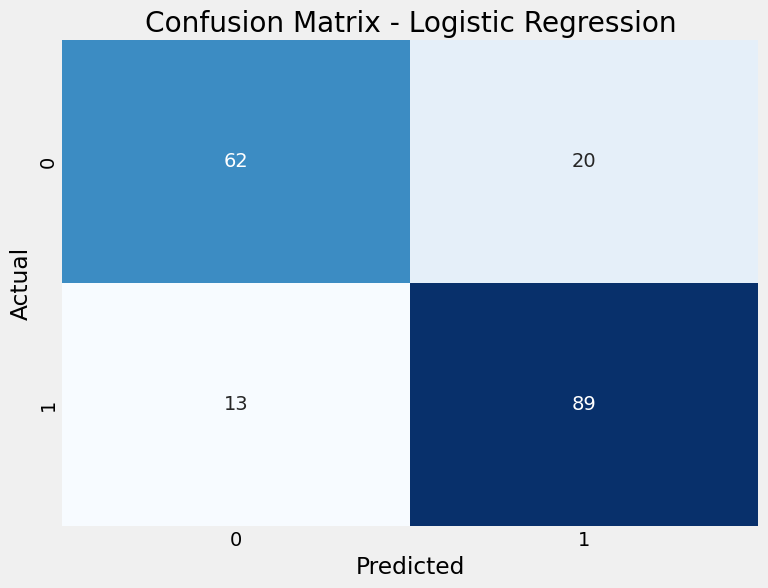


Gradient Boosting Results:
Accuracy: 0.8478

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



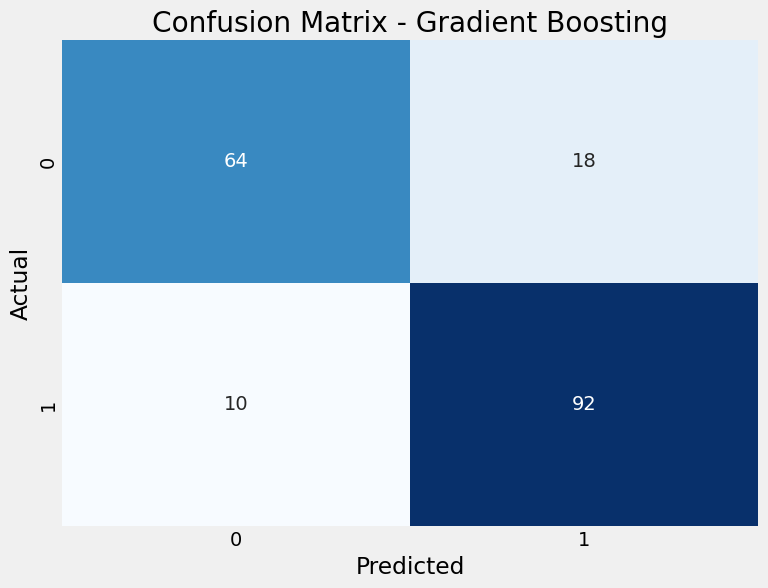


Random Forest Results:
Accuracy: 0.8478

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



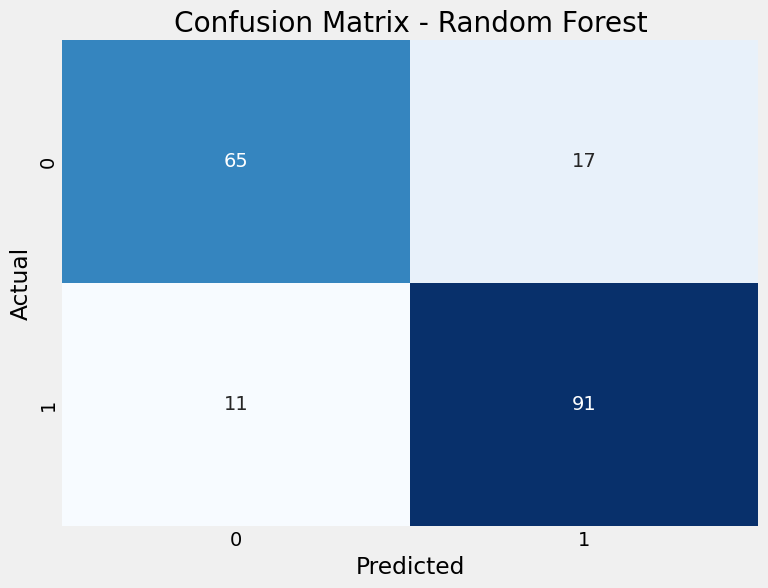

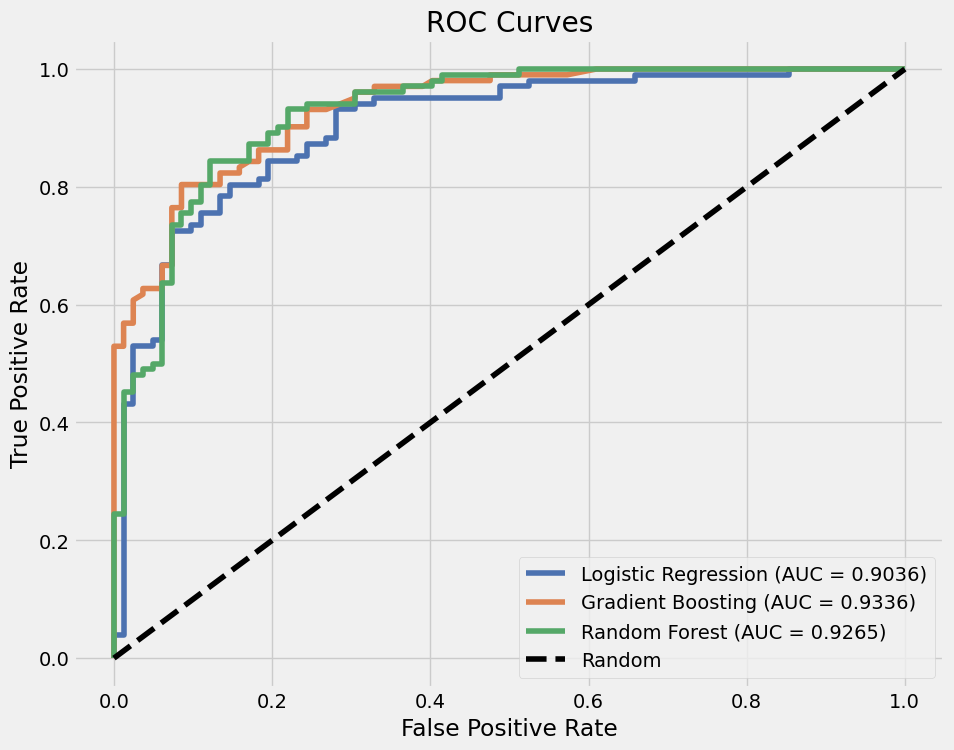


Cross-validation scores (5-fold):
Logistic Regression: 0.7630 (±0.1106)
Gradient Boosting: 0.7696 (±0.0935)
Random Forest: 0.7630 (±0.0937)


In [ ]:
# Train and evaluate models
results1 = {}
for name, model in best_models.items():
    results1[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results1.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["auc"]:.4f})')



plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Cross-validation for more reliable performance estimates
print("\nCross-validation scores (5-fold):")
for name, model in best_models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



## 7. Feature Importance Analysis



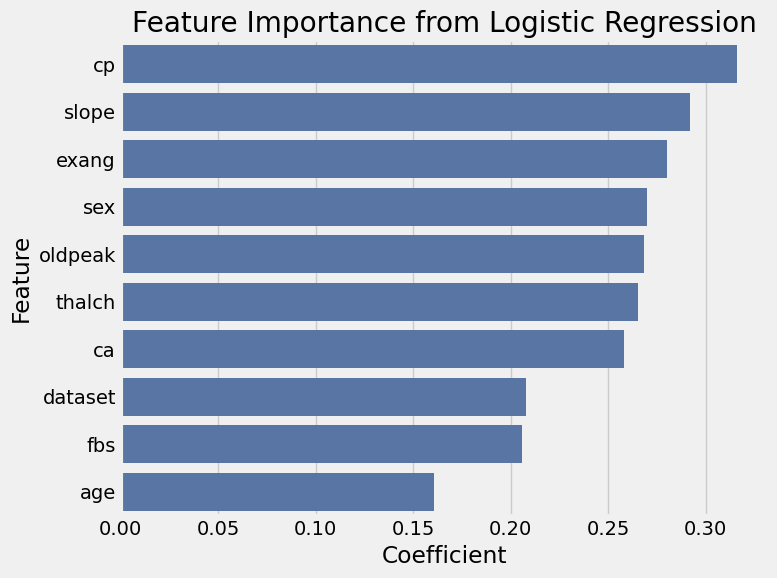


Top 5 Important Features:

Logistic Regression:
    Feature  Coefficient
3        cp     0.316225
11    slope     0.292247
9     exang     0.280460
1       sex     0.269911
10  oldpeak     0.268340


In [ ]:
# Feature Importance Analysis

# Get coefficients from Logistic Regression
lr_model = best_models['Logistic Regression']
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Coefficient', ascending=False)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr.head(10))
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()


# Print top 5 important features
print("\nTop 5 Important Features:")
print("\nLogistic Regression:")
print(feature_importance_lr.head(5))

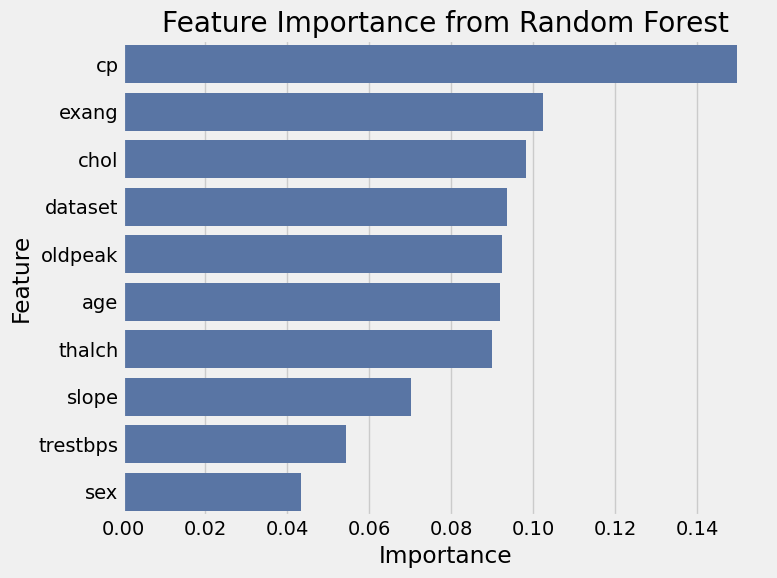


Top 5 Important Features:

Random Forest:
    Feature  Importance
3        cp    0.149721
9     exang    0.102302
5      chol    0.098088
2   dataset    0.093495
10  oldpeak    0.092337


In [ ]:
# Feature Importance Analysis

# Get feature importance from Random Forest
rf_model = best_models['Random Forest']
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10))
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Print top 5 important features
print("\nTop 5 Important Features:")
print("\nRandom Forest:")
print(feature_importance_rf.head(5))





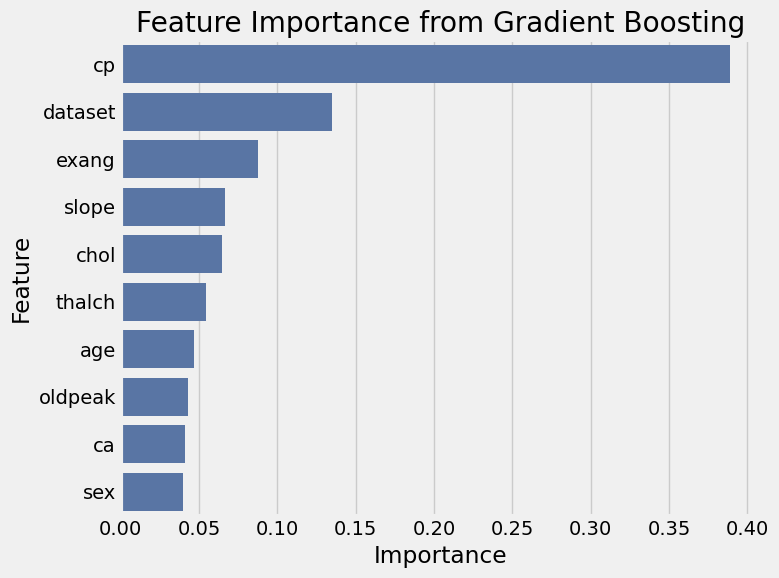


Top 5 Important Features:

Gradient Boosting:
    Feature  Importance
3        cp    0.388738
2   dataset    0.134822
9     exang    0.087551
11    slope    0.066270
5      chol    0.064453


In [ ]:
# Feature Importance Analysis

# Get feature importance from Gradient Boosting
gb_model = best_models['Gradient Boosting']
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(10))
plt.title('Feature Importance from Gradient Boosting')
plt.tight_layout()
plt.show()

# Print top 5 important features
print("\nTop 5 Important Features:")
print("\nGradient Boosting:")
print(feature_importance_gb.head(5))





## 8. Model Comparison and Conclusion



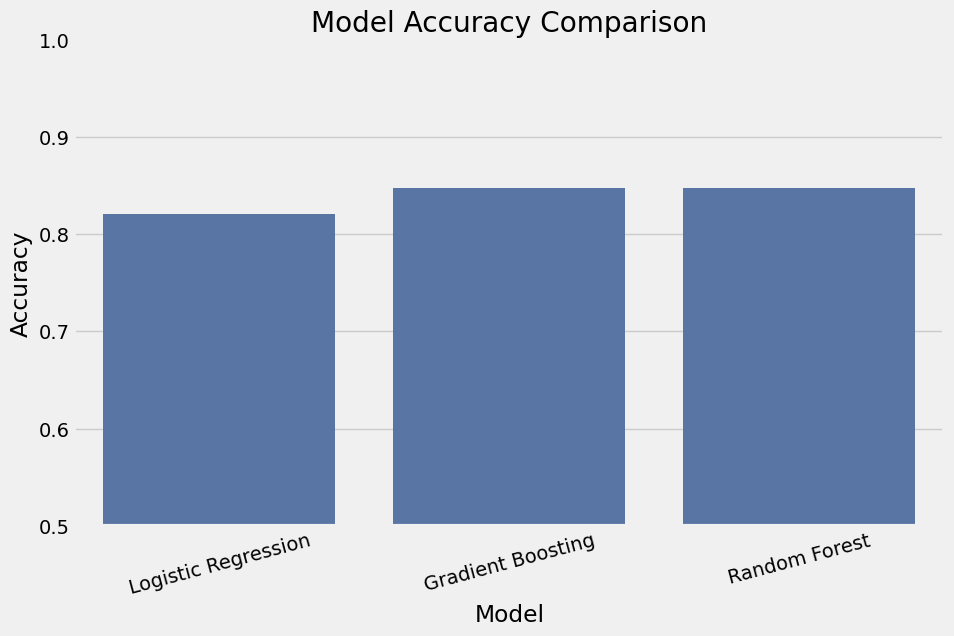


The best performing model is Gradient Boosting with an accuracy of 0.8478
Best model saved as 'heart_disease_prediction_model.pkl'


In [ ]:
# Final Model Comparison

# Evaluate all tuned models on the test set
final_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    final_results[name] = accuracy

# Visualize model performance
plt.figure(figsize=(10, 6))
models_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Accuracy': list(final_results.values())
})
sns.barplot(x='Model', y='Accuracy', data=models_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=15)
plt.show()

# Identify the best model
best_model_name = max(final_results, key=final_results.get)
best_model = best_models[best_model_name]
best_accuracy = final_results[best_model_name]

print(f"\nThe best performing model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

# Save the best model
import pickle
with open('heart_disease_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Best model saved as 'heart_disease_prediction_model.pkl'")



In [ ]:
# Conclusion
print("\nConclusion:")
print("1. This project successfully implemented three machine learning algorithms for heart disease prediction.")
print(f"2. The {best_model_name} model achieved the highest accuracy of {best_accuracy:.4f}.")
print("3. Key predictors of heart disease across models include:")

top_features = set()
for features in [feature_importance_rf.head(3)['Feature'],
                feature_importance_lr.head(3)['Feature'],
                feature_importance_gb.head(3)['Feature']]:
    for feature in features:
        top_features.add(feature)

for feature in top_features:
    print(f"   - {feature}")

print("4. This model can assist healthcare providers in early heart disease risk assessment.")
print("5. Future work could explore more complex models or integrate additional patient data.")


Conclusion:
1. This project successfully implemented three machine learning algorithms for heart disease prediction.
2. The Gradient Boosting model achieved the highest accuracy of 0.8478.
3. Key predictors of heart disease across models include:
   - chol
   - cp
   - dataset
   - exang
   - slope
4. This model can assist healthcare providers in early heart disease risk assessment.
5. Future work could explore more complex models or integrate additional patient data.




## 9. Sample Patient Prediction Function



In [ ]:
# Function to predict heart disease for new patients
def predict_heart_disease(patient_data, model, scaler):
    """
    Make a prediction for a new patient.

    Parameters:
    patient_data: Dictionary with patient features
    model: Trained model
    scaler: Fitted scaler

    Returns:
    Prediction (0=No Heart Disease, 1=Heart Disease) and probability
    """
    # Convert patient data to dataframe
    patient_df = pd.DataFrame([patient_data])

    # Scale the data
    patient_scaled = scaler.transform(patient_df)

    # Make prediction
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0][1]

    return prediction, probability

# Example usage
sample_patient = {
    'age': 55,
    'sex': 1,
    'dataset': 0,
    'cp': 2,  # Chest pain type
    'trestbps': 145,  # Resting blood pressure
    'chol': 233,  # Cholesterol
    'fbs': 1,  # Fasting blood sugar
    'restecg': 1,  # Resting ECG
    'thalch': 150,  # Max heart rate
    'exang': 0,  # Exercise induced angina
    'oldpeak': 2.3,  # ST depression
    'slope': 2,  # Slope
    'ca': 0,  # Number of major vessels
    'thal': 1  # Thalassemia
}

prediction, probability = predict_heart_disease(sample_patient, best_model, scaler)

print("\nSample Patient Prediction:")
print(f"Heart Disease: {'Yes' if prediction == 1 else 'No'}")
print(f"Probability: {probability:.4f}")


Sample Patient Prediction:
Heart Disease: No
Probability: 0.2677
